<a href="https://colab.research.google.com/github/kurtsenol/machine-learning/blob/master/TopicModeling/LDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import pickle

In [ ]:
df = pd.read_pickle("drive/My Drive/Topic_Modeling/topic_df.pkl")

In [ ]:
df

,Title,Journal,Year,Abstract
0,TWO-DIRECTIONAL CONVERGENCE OF PLATFORM AND PI...,JOURNAL OF SERVICE MANAGEMENT,NaN,PURPOSE THIS ARTICLE EXAMINES THE NEW PHENOMEN...
1,EMPLOYEE WELLNESS ON THE FRONTLINE: AN INTERAC...,JOURNAL OF SERVICE MANAGEMENT,NaN,PURPOSE EMPLOYEE WELLNESS IS VITAL TO CREATING...
2,DEMOGRAPHIC AND ATTITUDINAL ANTECEDENTS OF CON...,JOURNAL OF SERVICE MANAGEMENT,NaN,PURPOSE TO INVESTIGATE IF ONLINE TV CONTENT PL...
3,MORE THAN A FEELING? TOWARD A THEORY OF CUSTOM...,JOURNAL OF SERVICE MANAGEMENT,NaN,PURPOSE RESPONDING TO AN INCREASING CALL FOR A...
4,ACCOUNTABLE ALGORITHMS? THE ETHICAL IMPLICATIO...,JOURNAL OF SERVICE MANAGEMENT,NaN,PURPOSE THE PURPOSE OF THIS STUDY IS TO IDENTI...
...,...,...,...,...
10869,A COMMENTARY ON THE CASE STUDY OF STATE-OWNED ...,CORNELL HOSPITALITY QUARTERLY,2011.0,THE COMPARISON OF STEPHEN RUSHMORE'S SEVEN HOT...
10870,COMMENTARY ON A CASE STUDY OF STATE-OWNED HOTE...,CORNELL HOSPITALITY QUARTERLY,2011.0,THE RECENT LIQUIDITY CRISIS IN THE GLOBAL HOTE...
10871,A MULTIDIMENSIONAL SCALE OF SWITCHING BARRIERS...,CORNELL HOSPITALITY QUARTERLY,2011.0,THIS RESEARCH ATTEMPTED TO DEVELOP A MEASUREME...
10872,A COMPARISON OF COLD-WATER THAWING OPTIONS IN ...,CORNELL HOSPITALITY QUARTERLY,2011.0,CONSIDERING ALL TYPES OF RESTAURANTS IN HONG K...


In [ ]:
df.groupby('Journal')['Abstract'].count()

Journal
ANNALS OF TOURISM RESEARCH                                       706
CORNELL HOSPITALITY QUARTERLY                                    331
CURRENT ISSUES IN TOURISM                                        944
INTERNATIONAL JOURNAL OF CONTEMPORARY HOSPITALITY MANAGEMENT    1037
INTERNATIONAL JOURNAL OF HOSPITALITY MANAGEMENT                 1372
INTERNATIONAL JOURNAL OF TOURISM RESEARCH                        552
JOURNAL OF HOSPITALITY AND TOURISM MANAGEMENT                    259
JOURNAL OF HOSPITALITY MARKETING & MANAGEMENT                    241
JOURNAL OF SERVICE MANAGEMENT                                    316
JOURNAL OF SUSTAINABLE TOURISM                                   746
JOURNAL OF TRAVEL & TOURISM MARKETING                            624
JOURNAL OF TRAVEL RESEARCH                                       686
JOURNAL OF VACATION MARKETING                                    177
RESEARCH IN TRANSPORTATION BUSINESS AND MANAGEMENT               195
SCANDINAVIAN JOURNAL OF HO

In [ ]:
order = df.Journal.value_counts(ascending=True).index

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


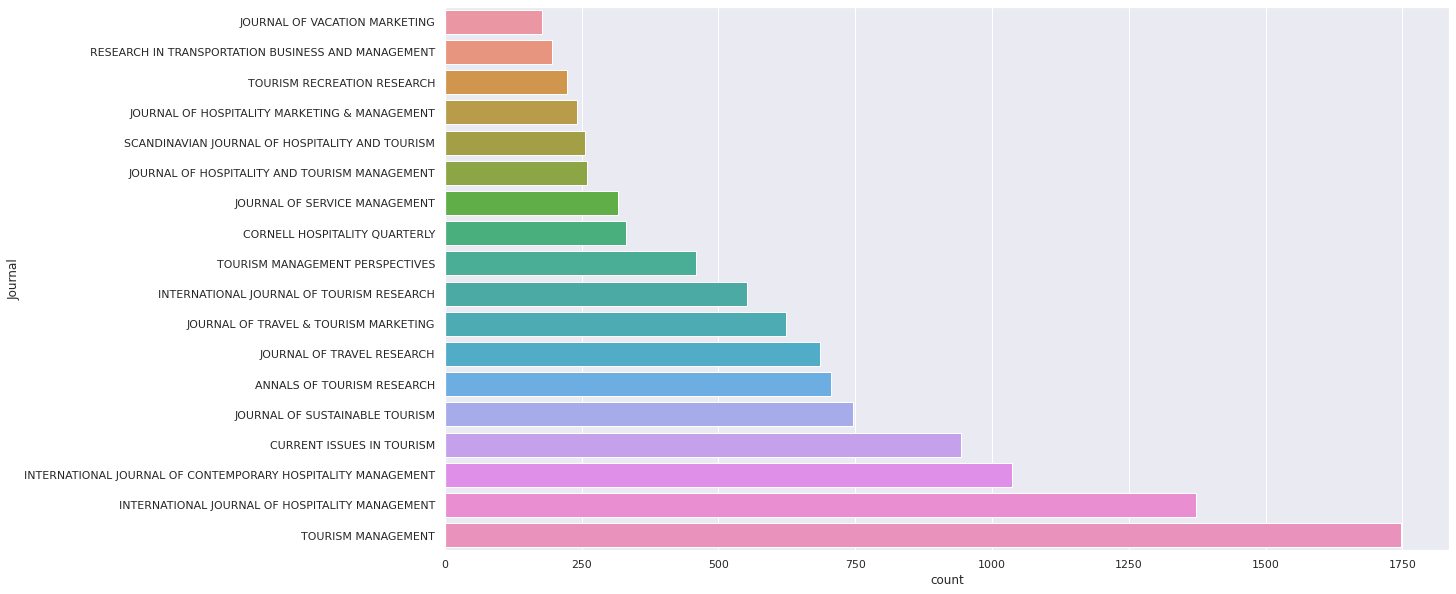

In [ ]:
plt.figure(figsize=(18,10))
sns.countplot(y='Journal', data=df, orient='h', order=order);

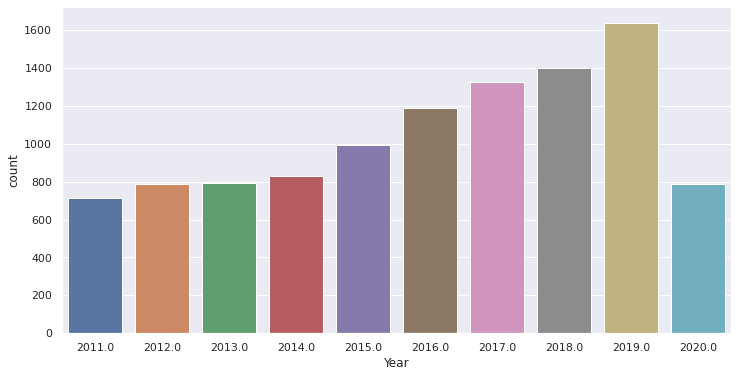

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Year', data=df, orient='v');

In [ ]:
papers = list(df.Abstract.values)

In [ ]:
len(papers)

10874

In [ ]:
print(papers[0][:1000])

PURPOSE THIS ARTICLE EXAMINES THE NEW PHENOMENON OF THE CONVERGENCE OF PLATFORM AND PIPELINE BUSINESS MODELS. IT EXAMINES THE POTENTIAL SYNERGIES AND CHALLENGES FOR PLATFORMS TO ADD PIPELINE COMPONENTS AND VICE VERSA FOR PIPELINE BUSINESSES. DESIGN/METHODOLOGY/APPROACH THIS PAPER USES A CONCEPTUAL APPROACH THAT SYNTHESIZES AND INTEGRATES THE LITERATURE FROM SERVICE, HOSPITALITY, AND STRATEGY, AND SUPPLEMENTS THEM WITH TWO ILLUSTRATIVE MINI-CASE STUDIES. FINDINGS WHILE THE EXTANT LITERATURE TYPICALLY FOCUSES ON THE DICHOTOMY BETWEEN INCUMBENT PIPELINE BUSINESSES THAT CREATE VALUE BY CONTROLLING A LINEAR SERIES OF ACTIVITIES AND NETWORK EFFECTS-DRIVEN PLATFORMS, WE DIFFERENTIATE BETWEEN TWO TYPES OF PLATFORM BUSINESS MODELS (I.E. PLATFORMS WITH ASSET CONTROL AND PLATFORMS WITH PEER-PROVIDED ASSETS). FURTHER, WE IDENTIFY THREE COMMON PATHWAYS OF CONVERGENCE; THAT IS, PIPELINES MOVING TOWARDS (1) PLATFORMS WITH ASSET CONTROL AND (2) THOSE WITH PEER-PROVIDED ASSETS, AND (3) PLATFORMS WITH P

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

def docs_preprocessor(docs):
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(docs)):
        docs[idx] = docs[idx].lower()  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isdigit()] for doc in docs]
    
    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 3] for doc in docs]
    
    # Lemmatize all words in documents.
    lemmatizer = WordNetLemmatizer()
    docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
  
    return docs


In [ ]:
# Perform function on our document
docs = docs_preprocessor(papers)


In [ ]:
#Create Biagram & Trigram Models 
from gensim.models import Phrases

# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
#Remove rare & common tokens 
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=10, no_above=0.5)

In [ ]:
#Create dictionary and corpus required for Topic Modeling
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
print(corpus[:1])

Number of unique tokens: 8553
Number of documents: 10874
[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 3), (5, 2), (6, 10), (7, 5), (8, 12), (9, 8), (10, 1), (11, 3), (12, 8), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 4), (21, 1), (22, 9), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 3), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 2), (39, 2), (40, 1), (41, 3), (42, 1), (43, 1), (44, 2), (45, 3), (46, 2), (47, 1), (48, 1), (49, 4), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 2), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 3), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 8), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 3), (76, 1), (77, 1), (78, 1), (79, 1), (80, 6), (81, 1), (82, 13), (83, 5), (84, 1), (85, 3), (86, 6), (87, 1), (88, 3), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 2), (96, 3), (97, 1), (98, 1), (99, 8), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1)

In [ ]:
# Set parameters.
num_topics = 5
chunksize = 500 
passes = 20 
iterations = 400
eval_every = 1  

In [ ]:
# Make a index to word dictionary.
temp = dictionary[0]  # only to "load" the dictionary.
id2word = dictionary.id2token

lda_model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)
# Print the Keyword in the 5 topics
print(lda_model.print_topics())

[(0, '0.027*"this_study" + 0.018*"customer" + 0.015*"relationship_between" + 0.012*"relationship" + 0.012*"satisfaction" + 0.012*"employee" + 0.011*"effect" + 0.011*"intention" + 0.010*"service" + 0.010*"brand"'), (1, '0.041*"tourism" + 0.017*"this_paper" + 0.010*"this_article" + 0.009*"development" + 0.008*"paper" + 0.007*"destination" + 0.007*"elsevier_right" + 0.006*"from" + 0.006*"have" + 0.005*"community"'), (2, '0.033*"hotel" + 0.019*"this_study" + 0.010*"result" + 0.009*"effect" + 0.008*"model" + 0.008*"performance" + 0.007*"elsevier_right" + 0.007*"firm" + 0.006*"relationship_between" + 0.006*"restaurant"'), (3, '0.022*"this_study" + 0.017*"tourist" + 0.014*"were" + 0.013*"experience" + 0.012*"their" + 0.012*"travel" + 0.010*"destination" + 0.006*"food" + 0.006*"visitor" + 0.006*"more"'), (4, '0.015*"research" + 0.011*"design_methodology" + 0.010*"hospitality" + 0.010*"originality_value" + 0.010*"service" + 0.009*"this_study" + 0.008*"value" + 0.008*"approach" + 0.007*"finding"

In [ ]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3918793608216192


In [ ]:
# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -1.7191199115009639


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs, start=2, limit=40, step=1)


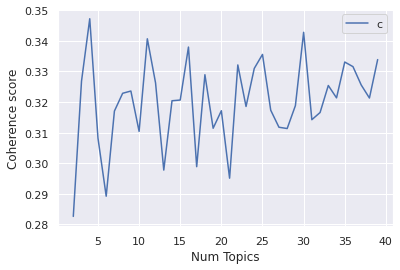

In [ ]:
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

### 2nd Trial 

In [ ]:
papers = list(df.Abstract.values)

In [ ]:
def docs_preprocessor(docs):
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(docs)):
        docs[idx] = docs[idx].lower()  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if token.isalpha()] for doc in docs] # replace 'not isdigit()' with 'isalpha'
    
    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 3] for doc in docs]
    
    # Lemmatize all words in documents.
    lemmatizer = WordNetLemmatizer()
    docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
  
    return docs

In [ ]:
# Perform function on our document
docs = docs_preprocessor(papers)

In [ ]:
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 100 times or more.
bigram = Phrases(docs, min_count=100) # replace 10 with 100
trigram = Phrases(bigram[docs])

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
#Remove rare & common tokens 
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=20, no_above=0.6) #replace 10 with 20, 0.5 with 0.6

In [ ]:
#Create dictionary and corpus required for Topic Modeling
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
print(corpus[:1])

Number of unique tokens: 5103
Number of documents: 10874
[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 3), (5, 10), (6, 5), (7, 12), (8, 1), (9, 3), (10, 8), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 4), (19, 1), (20, 9), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 3), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 2), (36, 2), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 3), (43, 2), (44, 1), (45, 4), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 2), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 3), (58, 1), (59, 1), (60, 1), (61, 1), (62, 8), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 3), (70, 1), (71, 1), (72, 1), (73, 1), (74, 6), (75, 1), (76, 13), (77, 5), (78, 1), (79, 3), (80, 6), (81, 1), (82, 3), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 2), (90, 3), (91, 1), (92, 8), (93, 1), (94, 1), (95, 1), (96, 1), (97, 6), (98, 3), (99, 2), (100, 2), (101, 1), (102, 1), (103, 1), (104, 1)

In [ ]:
# Set parameters.
num_topics = 5
chunksize = 500 
passes = 20 
iterations = 400
eval_every = 1  

In [ ]:
# Make a index to word dictionary.
temp = dictionary[0]  # only to "load" the dictionary.
id2word = dictionary.id2token

lda_model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)
# Print the Keyword in the 5 topics
print(lda_model.print_topics())

[(0, '0.015*"research" + 0.013*"this_paper" + 0.010*"with" + 0.010*"paper" + 0.009*"approach" + 0.009*"hospitality" + 0.008*"design_methodology" + 0.007*"industry" + 0.007*"originality_value" + 0.007*"management"'), (1, '0.024*"hotel" + 0.016*"this_study" + 0.012*"elsevier_right" + 0.012*"firm" + 0.011*"performance" + 0.010*"result" + 0.010*"model" + 0.009*"port" + 0.009*"effect" + 0.008*"tourism"'), (2, '0.055*"tourism" + 0.018*"destination" + 0.014*"development" + 0.010*"local" + 0.009*"environmental" + 0.009*"this_paper" + 0.009*"community" + 0.008*"with" + 0.008*"destination_image" + 0.008*"event"'), (3, '0.024*"this_study" + 0.021*"tourist" + 0.016*"travel" + 0.014*"their" + 0.014*"with" + 0.013*"experience" + 0.013*"were" + 0.012*"elsevier_right" + 0.011*"destination" + 0.008*"decision_making"'), (4, '0.033*"this_study" + 0.018*"customer" + 0.016*"relationship_between" + 0.014*"service" + 0.013*"hotel" + 0.013*"employee" + 0.011*"relationship" + 0.011*"effect" + 0.010*"satisfacti

In [ ]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.39264997496448284


In [ ]:
# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -1.7606765014834516


In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs, start=2, limit=40, step=1)

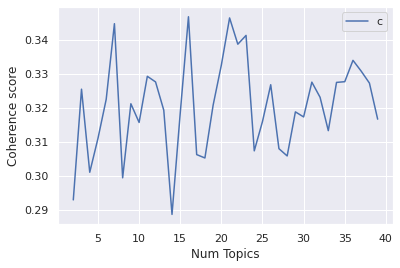

In [ ]:
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

Source: https://datascienceplus.com/valuation-of-topic-modeling-topic-coherence/